In [304]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import os

Direct Marketing
1. Given data is from a direct marketer who sells his product only via direct email
2. He sends catalogues with product characteristics to customers, who can directly order from catalogue
3. Learn what makes some customers spend more than others

predicting the amont spent by the customers

In [305]:
dm=pd.read_csv('dm.csv')
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [306]:
dm = dm.drop('Cust_Id', axis=1)

In [307]:
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


In [308]:
dmn = dm.select_dtypes(include=np.number)
dmn.head()

,Salary,Children,Catalogs,AmountSpent
0,47500,0,6,755
1,63600,0,6,1318
2,13500,0,18,296
3,85600,1,18,2436
4,68400,0,12,1304


In [309]:
dmc= dm.select_dtypes(exclude=np.number)

In [310]:
dmc.head()

,Age,Gender,OwnHome,Married,Location,History
0,Old,Female,Own,Single,Far,High
1,Middle,Male,Rent,Single,Close,High
2,Young,Female,Rent,Single,Close,Low
3,Middle,Male,Own,Married,Close,High
4,Middle,Female,Own,Single,Close,High


Exploration and preparation

In [311]:
#Sanity check
dm.isnull().sum()/dm.shape[0]

Age            0.000
Gender         0.000
OwnHome        0.000
Married        0.000
Location       0.000
Salary         0.000
Children       0.000
History        0.303
Catalogs       0.000
AmountSpent    0.000
dtype: float64

In [312]:
dm['History'].unique()

array(['High', 'Low', 'Medium', nan], dtype=object)

In [313]:
dm['History'].value_counts()

High      255
Low       230
Medium    212
Name: History, dtype: int64

In [314]:
dm['History']=dm['History'].fillna('Missing',axis=0)

In [315]:
dm['History'].unique()

array(['High', 'Low', 'Medium', 'Missing'], dtype=object)

In [316]:
dm['History'].value_counts()

Missing    303
High       255
Low        230
Medium     212
Name: History, dtype: int64

In [317]:
dmn.describe()

,Salary,Children,Catalogs,AmountSpent
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,56103.900000,0.93400,14.682000,1216.770000
std,30616.314826,1.05107,6.622895,961.068613
min,10100.000000,0.00000,6.000000,38.000000
25%,29975.000000,0.00000,6.000000,488.250000
50%,53700.000000,1.00000,12.000000,962.000000
75%,77025.000000,2.00000,18.000000,1688.500000
max,168800.000000,3.00000,24.000000,6217.000000


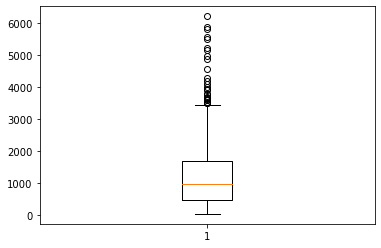

In [318]:
b=plt.boxplot(dm['AmountSpent'])

In [319]:
b

{'whiskers': [<matplotlib.lines.Line2D at 0x2aa80729400>,
 'caps': [<matplotlib.lines.Line2D at 0x2aa80729ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2aa807290a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2aa807361c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2aa80736520>],
 'means': []}

In [320]:
#Outliers
out=[i.get_ydata() for i in b['fliers']]
out

[array([5564, 3655, 3604, 4182, 4558, 3505, 3688, 3596, 4279, 4894, 3491,
        5830, 3632, 3916, 3671, 5151, 3941, 5878, 5209, 4984, 4109, 3995,
        3780, 6217, 3785, 3537, 5503], dtype=int64)]

C:\Users\mallikarjunad\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='AmountSpent'>

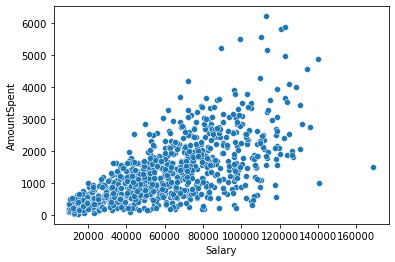

In [321]:
sn.scatterplot(dm.Salary,dm.AmountSpent)

In [322]:
dmn.corr()

,Salary,Children,Catalogs,AmountSpent
Salary,1.000000,0.049663,0.183551,0.699596
Children,0.049663,1.000000,-0.113455,-0.222308
Catalogs,0.183551,-0.113455,1.000000,0.472650
AmountSpent,0.699596,-0.222308,0.472650,1.000000


C:\Users\mallikarjunad\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Children', ylabel='AmountSpent'>

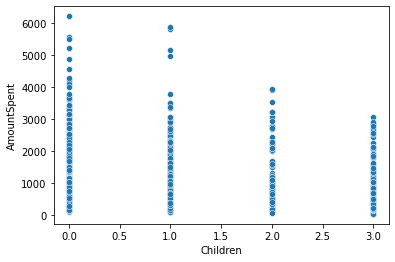

In [323]:
sn.scatterplot(dm.Children,dm.AmountSpent)

C:\Users\mallikarjunad\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Catalogs', ylabel='AmountSpent'>

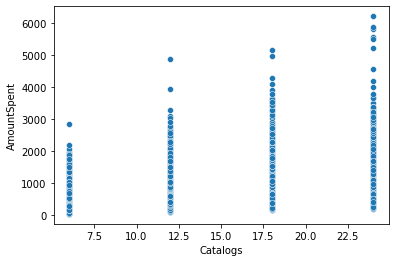

In [324]:
sn.scatterplot(dm.Catalogs,dm.AmountSpent)

In [325]:
dm[dm['AmountSpent'].isin(out[0])]['Salary'].describe()

count        27.000000
mean     107688.888889
std       18513.203881
min       68000.000000
25%       96400.000000
50%      110000.000000
75%      122850.000000
max      140000.000000
Name: Salary, dtype: float64

Understand relationship between Dependent Variable and Independent Variables

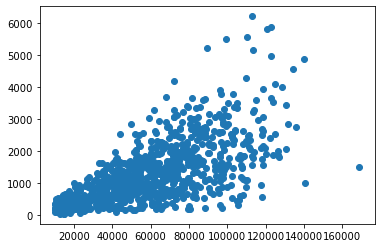

In [326]:
#Relationship between Salary and AmountSpent
plt.scatter(dm['Salary'],dm['AmountSpent']) #Might be heteroescadasticity

In [327]:
dmc.Age.value_counts()

Middle    508
Young     287
Old       205
Name: Age, dtype: int64

Text(0.5, 0.98, '')

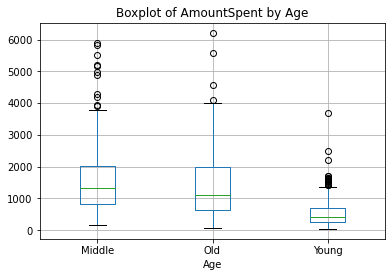

In [328]:
#Distribution of AmountSpent by Age
dm.boxplot('AmountSpent',by='Age')
plt.title(label='Boxplot of AmountSpent by Age')
plt.suptitle("")

In [329]:
import seaborn as sn
byage=dm.groupby('Age')['AmountSpent'].mean().reset_index()
byage

,Age,AmountSpent
0,Middle,1501.690945
1,Old,1432.126829
2,Young,558.623693


In [330]:
for i, v in byage.iterrows():
    print((i,v))

(0, Age                 Middle
AmountSpent    1501.690945
Name: 0, dtype: object)
(1, Age                    Old
AmountSpent    1432.126829
Name: 1, dtype: object)
(2, Age                 Young
AmountSpent    558.623693
Name: 2, dtype: object)


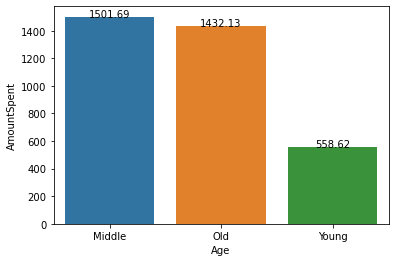

In [331]:
p=sn.barplot(x='Age',y='AmountSpent',data=byage)

for i,v in byage.iterrows():
    p.text(v.name,v.AmountSpent,round(v.AmountSpent,2),ha="center")

Text(0.5, 0.98, '')

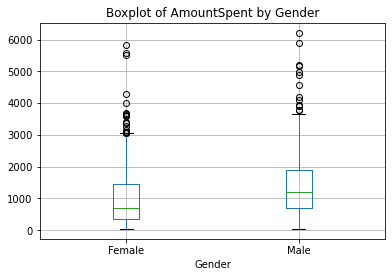

In [332]:
#Distribution of AmountSpent by Gender
dm.boxplot('AmountSpent',by='Gender')
plt.title(label='Boxplot of AmountSpent by Gender')
plt.suptitle("")

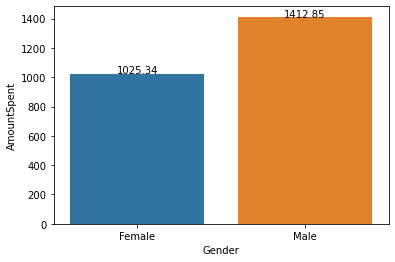

In [333]:
bygen=dm.groupby('Gender')['AmountSpent'].mean().reset_index()
bygen

p=sn.barplot(x='Gender',y='AmountSpent',data=bygen)

for i, v in bygen.iterrows():
    p.text(v.name,v.AmountSpent,round(v.AmountSpent,2),ha="center")

Text(0.5, 0.98, '')

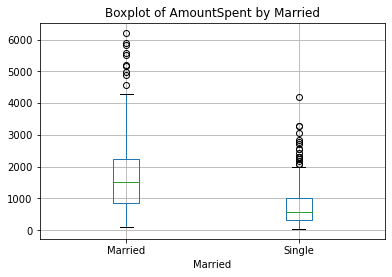

In [334]:
#Distribution of AmountSpent by Married
dm.boxplot('AmountSpent',by='Married')
plt.title(label='Boxplot of AmountSpent by Married')
plt.suptitle("")

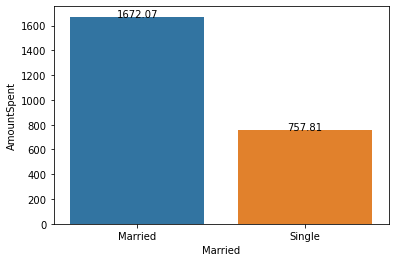

In [335]:
bymar=dm.groupby('Married')['AmountSpent'].mean().reset_index()
bymar

p=sn.barplot(x='Married',y='AmountSpent',data=bymar)

for i, v in bymar.iterrows():
    p.text(v.name,v.AmountSpent,round(v.AmountSpent,2),ha="center")

Text(0.5, 0.98, '')

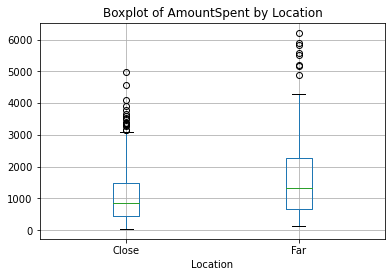

In [336]:
#Distribution of AmountSpent by Location
dm.boxplot('AmountSpent',by='Location')
plt.title(label='Boxplot of AmountSpent by Location')
plt.suptitle("")

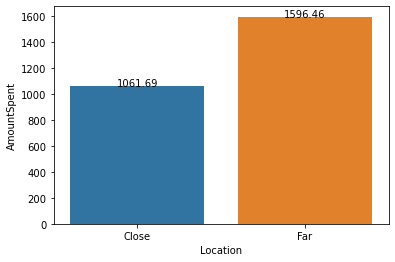

In [337]:
byloc=dm.groupby('Location')['AmountSpent'].mean().reset_index()
byloc

p=sn.barplot(x='Location',y='AmountSpent',data=byloc)

for i, v in byloc.iterrows():
    p.text(v.name,v.AmountSpent,round(v.AmountSpent,2),ha="center")

In [338]:
#Distribution of AmountSpent by History
byhist=dm.groupby('History')['AmountSpent'].mean().reset_index()
byhist

,History,AmountSpent
0,High,2186.137255
1,Low,357.086957
2,Medium,950.400943
3,Missing,1239.900990


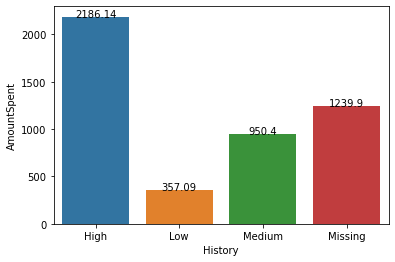

In [339]:
p=sn.barplot(x='History',y='AmountSpent',data=byhist)

for i, v in byhist.iterrows():
    p.text(v.name,v.AmountSpent,round(v.AmountSpent,2),ha="center")

In [340]:
#Is there any relationship between Gender and Marital status
table=pd.crosstab(dm['Gender'],dm['Married'])
table

Married,Married,Single
Gender,,
Female,225,281
Male,277,217


In [341]:
# heat=pd.crosstab(dm['Location'],dm['History'])
# sb.heatmap(heat,annot=True)

In [342]:
dm.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


In [343]:
#Create dummies
data=pd.get_dummies(dm)
data.head()

,Salary,Children,Catalogs,AmountSpent,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium,History_Missing
0,47500,0,6,755,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0
1,63600,0,6,1318,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0
2,13500,0,18,296,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0
3,85600,1,18,2436,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0
4,68400,0,12,1304,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0


In [344]:
data.shape

(1000, 19)

In [345]:
data.columns

Index(['Salary', 'Children', 'Catalogs', 'AmountSpent', 'Age_Middle',
       'Age_Old', 'Age_Young', 'Gender_Female', 'Gender_Male', 'OwnHome_Own',
       'OwnHome_Rent', 'Married_Married', 'Married_Single', 'Location_Close',
       'Location_Far', 'History_High', 'History_Low', 'History_Medium',
       'History_Missing'],
      dtype='object')

In [346]:
#Include n-1 dummies

In [347]:
import statsmodels.api as sm
X = sm.add_constant( data.drop('AmountSpent', axis=1) )
X.head(5)

,const,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium,History_Missing
0,1.0,47500,0,6,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0
1,1.0,63600,0,6,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0
2,1.0,13500,0,18,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0
3,1.0,85600,1,18,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0
4,1.0,68400,0,12,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0


In [348]:
Y= data.AmountSpent

In [349]:
from sklearn.model_selection import train_test_split

In [350]:
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.8,random_state = 2 )

In [351]:
train_X.shape

(800, 19)

In [352]:
model1= sm.OLS( train_y, train_X ).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            AmountSpent   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     188.0
Date:                Sat, 14 Aug 2021   Prob (F-statistic):          1.50e-221
Time:                        10:24:03   Log-Likelihood:                -6102.2
No. Observations:                 800   AIC:                         1.223e+04
Df Residuals:                     787   BIC:                         1.229e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -74.2210     21.603     -3.436      0.001    -116.627     -31.816
Salary              0.0196      0.001     16.560      0.000       0.017       0.022
Children         -172.3812     20.882     -8.255      0.000    -213.372    -131.390
Catalogs           43.1567      2.818     15.315      0.000      37.625      48.688
Age_Middle        -55.3243     35.003     -1.581      0.114    -124.034      13.385
Age_Old             2.5433     35.084      0.072      0.942     -66.325      71.412
Age_Young         -21.4400     34.785     -0.616      0.538     -89.722      46.842
Gender_Female      -9.8893     20.595     -0.480      0.631     -50.317      30.539
Gender_Male       -64.3317     22.974     -2.800      0.005    -109.429     -19.235
OwnHome_Own       -27.5627     25.026     -1.101      0.271     -76.687      21.562
OwnHome_Rent      -46.6583     22.304     -2.092      0.037     -90.440      -2.877
Married_Married   -57.0442     32.899     -1.734      0.083    -121.625       7.537
Married_Single    -17.1768     22.256     -0.772      0.440     -60.864      26.510
Location_Close   -267.1372     23.092    -11.569      0.000    -312.466    -221.809
Location_Far      192.9162     24.991      7.719      0.000     143.859     241.973
History_High      162.4135     44.027      3.689      0.000      75.990     248.837
History_Low      -174.4823     40.054     -4.356      0.000    -253.108     -95.856
History_Medium   -252.9344     33.309     -7.594      0.000    -318.320    -187.549
History_Missing   190.7822     30.065      6.346      0.000     131.764     249.800
==============================================================================
Omnibus:                      233.763   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1084.248
Skew:                           1.267   Prob(JB):                    3.62e-236
Kurtosis:                       8.110   Cond. No.                     1.45e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.59e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Interpretation:** The R-squared value obtained from this model is 74.4 which means that the above model explains 74.4% of the variation in the Total_Compensation. 

The `Durbin-Watson` test is used to check the autocorrelation between the residuals.

If the Durbin-Watson test statistic is near to 2: no autocorrelation<br>
If the Durbin-Watson test statistic is between 0 and 2: positive autocorrelation <br>
If the Durbin-Watson test statistic is between 2 and 4: negative autocorrelation

The summary output shows that the value of the test statistic is close to 2 (= 1.950) which means there is no autocorrelation.

The `Jarque-Bera` test is used to check the normality of the residuals. Here, the p-value of the test is less than 0.05; that implies the residuals are not normally distributed.

The 'Cond. No' (>1000) represents the `Condition Number (CN)` which is used to check the multicollinearity. 

If CN < 100: no multicollinearity<br>
If CN is between 100 and 1000: moderate multicollinearity<br>
If CN > 1000: severe multicollinearity

Thus, it can be seen that there is no multicollinearity in the data.

## Measures of Variation

## Sum of squared Regression(SSR)

It is defined as the sum of the squared difference between the predicted value and the mean of the dependent variable.

In [353]:
# calculate the SSR on train dataset
y_train_pred= model1.predict(train_X)

ssr = np.sum((y_train_pred - train_y.mean())**2)
ssr

566659716.9305508

## Sum of Squared Error (SSE)

In [354]:
sse = np.sum((train_y - y_train_pred)**2)
sse

197716963.2581982

In [355]:
ssr+sse

764376680.1887491

## Sum of Squared Total (SST)

In [356]:
# calculate the SST on train dataset
sst = np.sum((train_y - train_y.mean())**2)
sst

764376680.18875

## Coefficient of Determination (R-Squared)

The coefficient of determination explains the percentage of variation in the dependent variable that the independent variables explain collectively.

In [357]:
## Coefficient of Determination
r2= ssr/sst
r2

0.7413356943210561

In [358]:
n=800
k=13
adj_R2 = 1-(1-r2)*((n-1)/(n-k-1))
adj_R2

0.7370575315044832

In [359]:
test_X

,const,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium,History_Missing
37,1.0,47000,1,12,1,0,0,0,1,0,1,0,1,1,0,0,0,1,0
726,1.0,26200,1,12,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0
846,1.0,48100,2,18,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0
295,1.0,67300,3,6,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1
924,1.0,94200,1,18,1,0,0,0,1,0,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,1.0,96500,1,18,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0
810,1.0,26700,0,24,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0
930,1.0,28400,3,18,0,0,1,0,1,0,1,0,1,1,0,0,1,0,0
616,1.0,18400,1,12,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0


In [360]:
pred_y = model1.predict(test_X)
#pred_y = pd.DataFrame(pred_y)
pred_y.shape

(200,)

In [361]:
import os
os.getcwd()

'C:\\Users\\mallikarjunad\\Desktop\\FSDS\\SLR'

In [362]:
#pred_y.to_excel('pred.xlsx')

In [363]:
error = test_y-pred_y
error

37      93.290412
726    165.869890
846   -117.019581
295     28.551299
924   -841.052225
          ...    
839   -806.757991
810    167.693184
930     30.046075
616    106.109901
809   -164.886410
Length: 200, dtype: float64

C:\Users\mallikarjunad\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

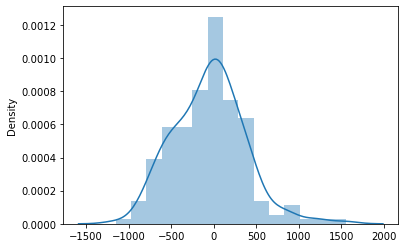

In [364]:
sn.distplot(error)

In [365]:
mse = error.var()
mse

176754.5028011728

In [366]:
rmse = error.std()
rmse

420.42181532500524

In [367]:
residuals=model1.resid
residuals

175    212.849382
818    149.312705
677   -381.872748
952     -1.553364
200    584.993324
          ...    
534   -964.272116
584    254.592132
493    171.212417
527    -20.251078
168    471.855379
Length: 800, dtype: float64

<Figure size 576x432 with 0 Axes>

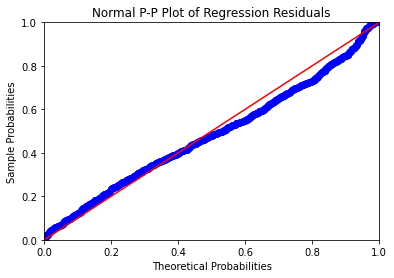

In [368]:
probplot = sm.ProbPlot( residuals , fit = True )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Normal P-P Plot of Regression Residuals" )
plt.show()

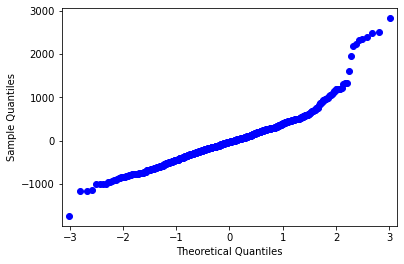

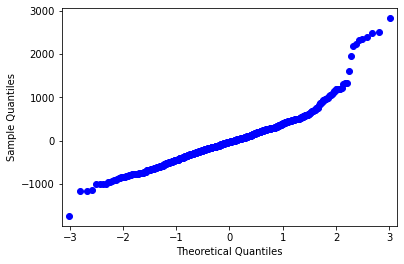

In [369]:
import statsmodels.api as sm
sm.qqplot(residuals)

In [370]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

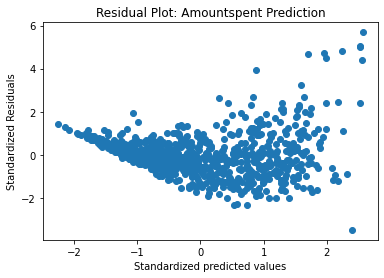

In [371]:
plt.scatter( get_standardized_values( model1.fittedvalues ),
get_standardized_values( residuals ) )
plt.title( "Residual Plot: Amountspent Prediction" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");

In [372]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            AmountSpent   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     188.0
Date:                Sat, 14 Aug 2021   Prob (F-statistic):          1.50e-221
Time:                        10:24:09   Log-Likelihood:                -6102.2
No. Observations:                 800   AIC:                         1.223e+04
Df Residuals:                     787   BIC:                         1.229e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -74.2210     21.603     -3.436      0.001    -116.627     -31.816
Salary              0.0196      0.001     16.560      0.000       0.017       0.022
Children         -172.3812     20.882     -8.255      0.000    -213.372    -131.390
Catalogs           43.1567      2.818     15.315      0.000      37.625      48.688
Age_Middle        -55.3243     35.003     -1.581      0.114    -124.034      13.385
Age_Old             2.5433     35.084      0.072      0.942     -66.325      71.412
Age_Young         -21.4400     34.785     -0.616      0.538     -89.722      46.842
Gender_Female      -9.8893     20.595     -0.480      0.631     -50.317      30.539
Gender_Male       -64.3317     22.974     -2.800      0.005    -109.429     -19.235
OwnHome_Own       -27.5627     25.026     -1.101      0.271     -76.687      21.562
OwnHome_Rent      -46.6583     22.304     -2.092      0.037     -90.440      -2.877
Married_Married   -57.0442     32.899     -1.734      0.083    -121.625       7.537
Married_Single    -17.1768     22.256     -0.772      0.440     -60.864      26.510
Location_Close   -267.1372     23.092    -11.569      0.000    -312.466    -221.809
Location_Far      192.9162     24.991      7.719      0.000     143.859     241.973
History_High      162.4135     44.027      3.689      0.000      75.990     248.837
History_Low      -174.4823     40.054     -4.356      0.000    -253.108     -95.856
History_Medium   -252.9344     33.309     -7.594      0.000    -318.320    -187.549
History_Missing   190.7822     30.065      6.346      0.000     131.764     249.800
==============================================================================
Omnibus:                      233.763   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1084.248
Skew:                           1.267   Prob(JB):                    3.62e-236
Kurtosis:                       8.110   Cond. No.                     1.45e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.59e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [373]:
## Objective
## need to minimise the error 
## mininsing the summation of ( actual - predicted)^2/no.of observations 

## Inferences about coefficients  

## ANOVA for SLR

ANOVA (Analysis of Variance) is used to test the significance of the linear regression model. The test hypothesis for ANOVA is given as:
<p style='text-indent:25em'> <strong> H<sub>o</sub>: β<sub>all</sub> = 0 </strong> (i.e. regression model is not significant) </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>: β<sub>all</sub> ≠ 0 </strong> (i.e. regression model is significant) </p>

There are several assumptions of linear regression. We can check two of them before building the regression model. Let us check the following assumptions in this section:<br>
1. Assumption on Dependent Variable<br>
2. No or little multicollinearity<br>

In [376]:
dm.AmountSpent.dtype

dtype('int64')

The assumption for linear regression is that the dependent (target) variable should be numeric. In our dataset, the variable 'Amonut spent' is the target/dependent variable.  

### No or Little Multicollinearity

Whenever there are a large number of independent variables present in the dataset, there is a possibility that such independent variables will be strongly correlated. The presence of a strong correlation between the independent variables is called multicollinearity.

The presence of multicollinearity can destabilize the model. Thus, the existence of multicollinearity must be detected and corrected actions should be taken.

If we use dummy variables to encode a categorical variable and do not omit the parent column, then this results in a strong correlation between the dummy variables and the parent column.


In [377]:
dmn.head()

,Salary,Children,Catalogs,AmountSpent
0,47500,0,6,755
1,63600,0,6,1318
2,13500,0,18,296
3,85600,1,18,2436
4,68400,0,12,1304


<AxesSubplot:>

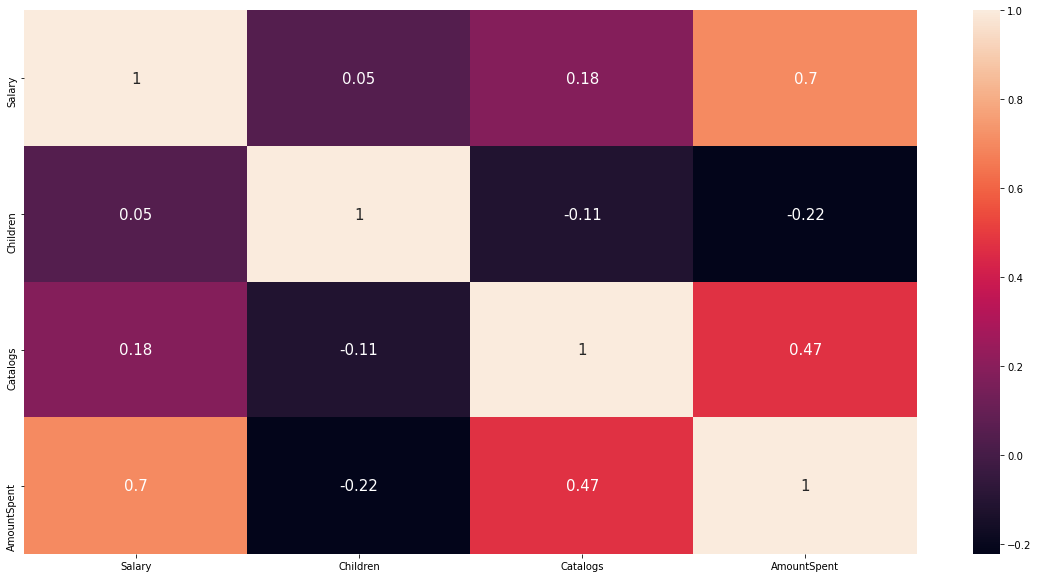

In [380]:
plt.figure(figsize = (20,10))
sn.heatmap(dmn.corr(), annot = True, annot_kws = {"size": 15})

<AxesSubplot:>

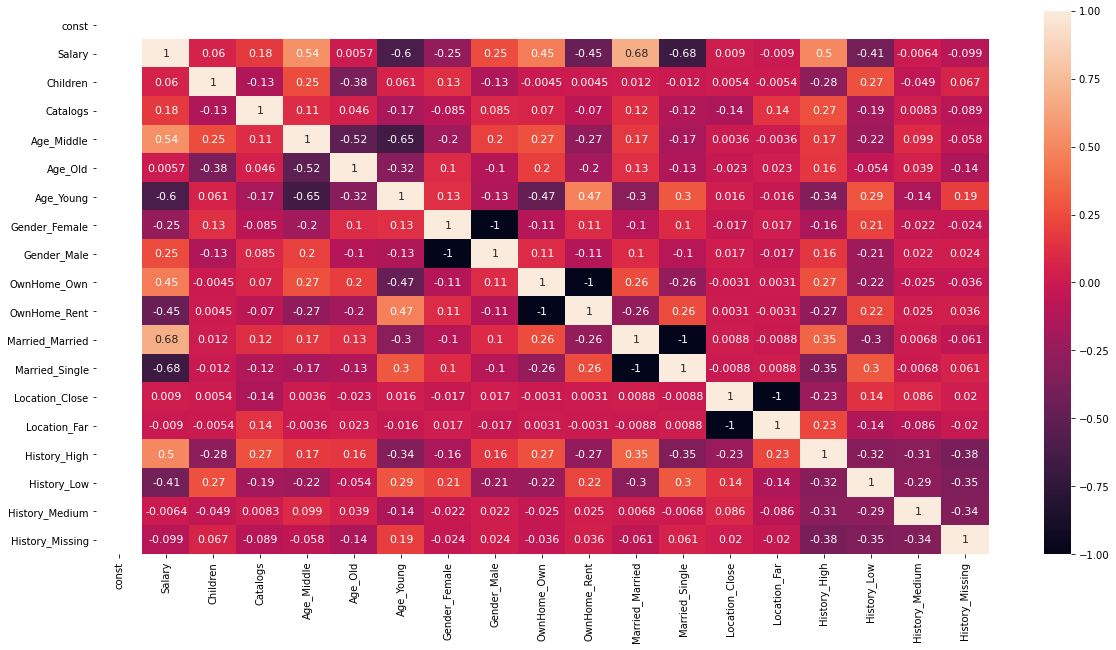

In [209]:
plt.figure(figsize = (20,10))
sn.heatmap(train_X.corr(), annot = True, annot_kws = {"size": 11})

## Variance Inflation Factor (VIF)

The Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity between the features. The value of VIF equal to 1 indicates that no features are correlated. We calculate VIF of the numerical independent variables.   

Steps to calculate VIF:<br>
1. Regress one independent variable (say V<sub>i</sub>) on all the remaining independent variables (say V<sub>j</sub>, j ≠ i)
2. Calculate R-squared of the regression model
3. Calculate VIF for the variable V<sub>i</sub> using the formula:
<p style='text-indent:29em'> <strong> VIF = 1 / (1 - R-squared)</strong>  </p><br>
4. Repeate the steps 1 to 3 to calculate VIF of each independent variable

if  rsqured = 1 vif --> infinite
if rsquared =0 vif ---> 1

In [387]:
rsquared = 0.5
vif_cal = 1/(1-rsquared)
vif_cal

2.0

In [284]:
train_X.head()

,const,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium,History_Missing
175,1.0,73100,0,6,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0
818,1.0,92400,1,6,1,0,0,1,0,0,1,1,0,0,1,0,0,0,1
677,1.0,40400,1,24,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0
952,1.0,63200,0,24,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0
200,1.0,100100,1,24,1,0,0,0,1,1,0,1,0,0,1,1,0,0,0


In [388]:
train_x_num_vif= train_X[['Salary','Children','Catalogs']]

In [389]:
train_x_num_vif.head()

,Salary,Children,Catalogs
175,73100,0,6
818,92400,1,6
677,40400,1,24
952,63200,0,24
200,100100,1,24


In [287]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [390]:
#Multicollinearity check
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(train_x_num_vif.values, i) for i in range(train_x_num_vif.shape[1])]
vif["Features"] = train_x_num_vif.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,3.652865,Salary
1,3.396557,Catalogs
2,1.616662,Children


In [ ]:
## Since vif values are not high (<5), we can ignore the multi colinearity

## Calculate the p-values to know the insignificant variables

In [391]:
model1_pvalues = pd.DataFrame(model1.pvalues, columns = ["P-Value"])
model1_pvalues

,P-Value
const,6.218961e-04
Salary,4.548690e-53
Children,6.384772e-16
Catalogs,1.560143e-46
Age_Middle,1.143755e-01
Age_Old,9.422290e-01
Age_Young,5.378343e-01
Gender_Female,6.312358e-01
Gender_Male,5.231633e-03
OwnHome_Own,2.710663e-01


## Create a list of insignificant variables

In [392]:
# subset the dataframe 'model1_pvalues' such that the variables will have p-value greater than 0.05
# store the subset of a dataframe to a new dataframe 'insignificant_var' 
insignificant_var = model1_pvalues[1:][model1_pvalues[1:]['P-Value'] > 0.05]

# get the variable names with p-value greater than 0.05
insigni_var = insignificant_var.index

# convert the variables to the type 'list' using 'to_list()'
insigni_var = insigni_var.to_list()

# print the list of insignificant variables
insigni_var

['Age_Middle',
 'Age_Old',
 'Age_Young',
 'Gender_Female',
 'OwnHome_Own',
 'Married_Married',
 'Married_Single']

In [291]:
X.head()

,const,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium,History_Missing
0,1.0,47500,0,6,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0
1,1.0,63600,0,6,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0
2,1.0,13500,0,18,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0
3,1.0,85600,1,18,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0
4,1.0,68400,0,12,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0


In [393]:
X.shape

(1000, 19)

In [399]:
X_signi_var = X.drop(['Age_Middle', 'Age_Old', 'Age_Young', 'Gender_Female', 'OwnHome_Own', 'Married_Married', 'Married_Single','Gender_Male','OwnHome_Rent'],axis=1)
X_signi_var.shape

(1000, 10)

In [400]:
Y.head()

0     755
1    1318
2     296
3    2436
4    1304
Name: AmountSpent, dtype: int64

In [401]:
# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_signi_var'
y_signi_var = Y.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_signi_var = sm.add_constant(X_signi_var)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_signi_var, X_test_signi_var, y_train_signi_var, y_test_signi_var = train_test_split(X_signi_var, y_signi_var, 
                                                                                            random_state=1, test_size = 0.2)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_signi_var', X_train_signi_var.shape)
print('y_train_signi_var', y_train_signi_var.shape)

# print dimension of test set
print('X_test_signi_var', X_test_signi_var.shape)
print('y_test_signi_var', y_test_signi_var.shape)

X_train_signi_var (800, 10)
y_train_signi_var (800,)
X_test_signi_var (200, 10)
y_test_signi_var (200,)


In [429]:
y_train_signi_var_log = np.sqrt(y_train_signi_var)

In [430]:

# building a model on training dataset
# fit() is used to fit the OLS model
MLR_model_with_significant_var = sm.OLS(y_train_signi_var_log, X_train_signi_var).fit()

# print the summary output
print(MLR_model_with_significant_var.summary())

                            OLS Regression Results                            
Dep. Variable:            AmountSpent   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     547.3
Date:                Sat, 14 Aug 2021   Prob (F-statistic):          2.20e-298
Time:                        11:19:40   Log-Likelihood:                -2488.0
No. Observations:                 800   AIC:                             4992.
Df Residuals:                     792   BIC:                             5029.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.3698      0.378     

C:\Users\mallikarjunad\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

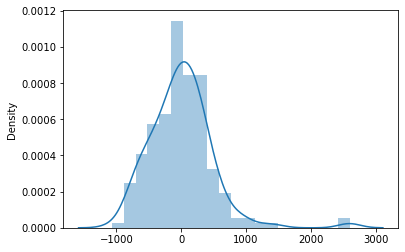

In [403]:
y_pred1 = MLR_model_with_significant_var.predict(X_test_signi_var)
error1 = y_test_signi_var-y_pred1
sn.distplot(error1)

Assumptions after model building
1. No Auto correlation ( Durbin - Watson test - value near to 2 )
2. Errors follow normal distribution ( Omnibus p-value or Jarque-Bera test -- pvalue > 0.05)


In [405]:
import scipy.stats as st
st.shapiro(error1)

ShapiroResult(statistic=0.9047356843948364, pvalue=5.086490673100741e-10)

C:\Users\mallikarjunad\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AmountSpent', ylabel='Density'>

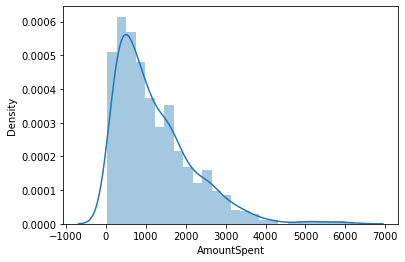

In [408]:
sn.distplot(Y)

In [409]:
st.shapiro(Y)

ShapiroResult(statistic=0.878403902053833, pvalue=3.058755389513997e-27)

C:\Users\mallikarjunad\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AmountSpent', ylabel='Density'>

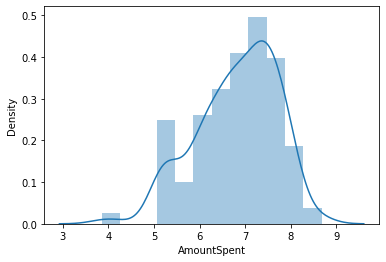

In [418]:
## Applying log transformation 
Y_log = np.log(y_test_signi_var)
sn.distplot(Y_log)

In [419]:
st.shapiro(Y_log)

ShapiroResult(statistic=0.9663905501365662, pvalue=0.00010382095933891833)

C:\Users\mallikarjunad\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\mallikarjunad\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

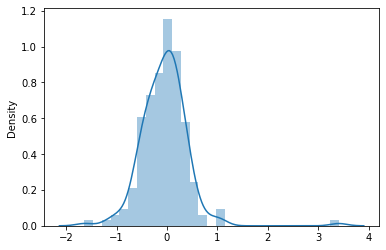

In [422]:
Y_pred_log = np.log(y_pred1)
error2 = Y_log -Y_pred_log
sn.distplot(error2)

In [423]:
st.shapiro(error2)

ShapiroResult(statistic=nan, pvalue=1.0)

In [424]:
error2.skew()

1.8683375233277957

In [425]:
error2.kurt()

15.153662785757236

0.7383464674963904 497.2297978378186


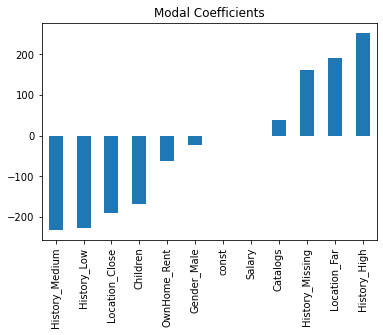

In [301]:
from sklearn.linear_model import Ridge
## training the model
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train_signi_var,y_train_signi_var)
ridge_pred = ridgeReg.predict(X_test_signi_var)
mse_rid=np.sqrt(np.mean((ridge_pred - y_test_signi_var)**2))
rsq_ridge=ridgeReg.score(X_test_signi_var,y_test_signi_var)

coef_rid = pd.Series(ridgeReg.coef_,X_train_signi_var.columns).sort_values()
plt.figure(2)
coef_rid.plot(kind='bar', title='Modal Coefficients')
print(rsq_ridge,mse_rid)

0.7383464674963904 497.2297978378186


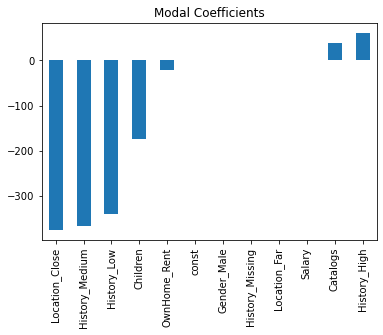

In [303]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.5, normalize=True)

lassoReg.fit(X_train_signi_var,y_train_signi_var)
lasso_pred = ridgeReg.predict(X_test_signi_var)
mse_lasso=np.sqrt(np.mean((ridge_pred - y_test_signi_var)**2))
rsq_lasso=ridgeReg.score(X_test_signi_var,y_test_signi_var)

coef_lasso = pd.Series(lassoReg.coef_,X_train_signi_var.columns).sort_values()
plt.figure(2)
coef_lasso.plot(kind='bar', title='Modal Coefficients')
print(rsq_lasso,mse_lasso)